- This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# handing missing values and data types

In [6]:
print(df.shape)
df.info()

(103904, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location             

In [7]:
df.isnull().sum()/df.shape[0]*100 # 0.3 % data is missing

Unnamed: 0                           0.000000
id                                   0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                       

In [8]:
df.dropna(inplace=True)

In [9]:
df.drop(columns=['Unnamed: 0','id'],inplace=True)

In [10]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
df1 = df.copy()

In [13]:
# handing categorical features

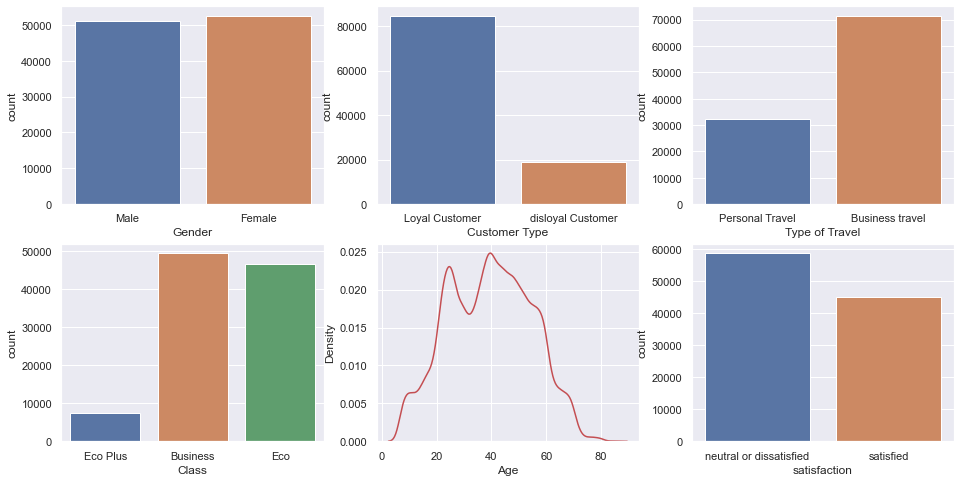

In [14]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
sns.countplot(x=df['Gender'])

plt.subplot(2,3,2)
sns.countplot(x=df['Customer Type'])

plt.subplot(2,3,3)
sns.countplot(x=df['Type of Travel'])

plt.subplot(2,3,4)
sns.countplot(x=df['Class'])

plt.subplot(2,3,5)
sns.kdeplot(x=df['Age'],color='r')

plt.subplot(2,3,6)
sns.countplot(x=df['satisfaction'])
plt.show()

In [15]:
df['Gender'].value_counts()

Female    52576
Male      51018
Name: Gender, dtype: int64

In [16]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male'else 0) # encoding

In [17]:
df['Customer Type'].value_counts()

Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64

In [18]:
df['Customer Type'].replace({'Loyal Customer':1, 'disloyal Customer':0},inplace=True) 

In [19]:
df['Type of Travel'].value_counts()

Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64

In [20]:
df['Type of Travel'] = df['Type of Travel'].apply(lambda x: 1 if x== 'Business travel' else 0)

In [21]:
df['Class'].value_counts()

Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64

In [22]:
df['Class'].replace({'Business':2, 'Eco Plus':1,'Eco':0}, inplace=True)

In [23]:
df['satisfaction'].value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

In [24]:
df['satisfaction'] = df['satisfaction'].apply(lambda x: 1 if x=='satisfied' else 0)

In [25]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,0,1,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0
1,1,0,25,1,2,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,0
2,0,1,26,1,2,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1
3,0,1,25,1,2,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,0
4,1,1,61,1,2,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1


In [26]:
df.corr()['satisfaction'].sort_values(ascending=False) # 'Arrival Delay in Minutes','Departure/Arrival time convenient',
# 'Departure Delay in Minutes','Gate location','Gender' is not highly correlated with target variable

satisfaction                         1.000000
Online boarding                      0.503447
Class                                0.494545
Type of Travel                       0.448995
Inflight entertainment               0.398203
Seat comfort                         0.349112
On-board service                     0.322450
Leg room service                     0.313182
Cleanliness                          0.305050
Flight Distance                      0.298915
Inflight wifi service                0.284163
Baggage handling                     0.247819
Inflight service                     0.244852
Checkin service                      0.235914
Food and drink                       0.209659
Customer Type                        0.187558
Ease of Online booking               0.171507
Age                                  0.137040
Gender                               0.012356
Gate location                        0.000449
Departure Delay in Minutes          -0.050515
Departure/Arrival time convenient 

In [27]:
df.drop(columns=['Arrival Delay in Minutes','Departure/Arrival time convenient','Departure Delay in Minutes','Gate location',
                'Gender'],inplace=True)

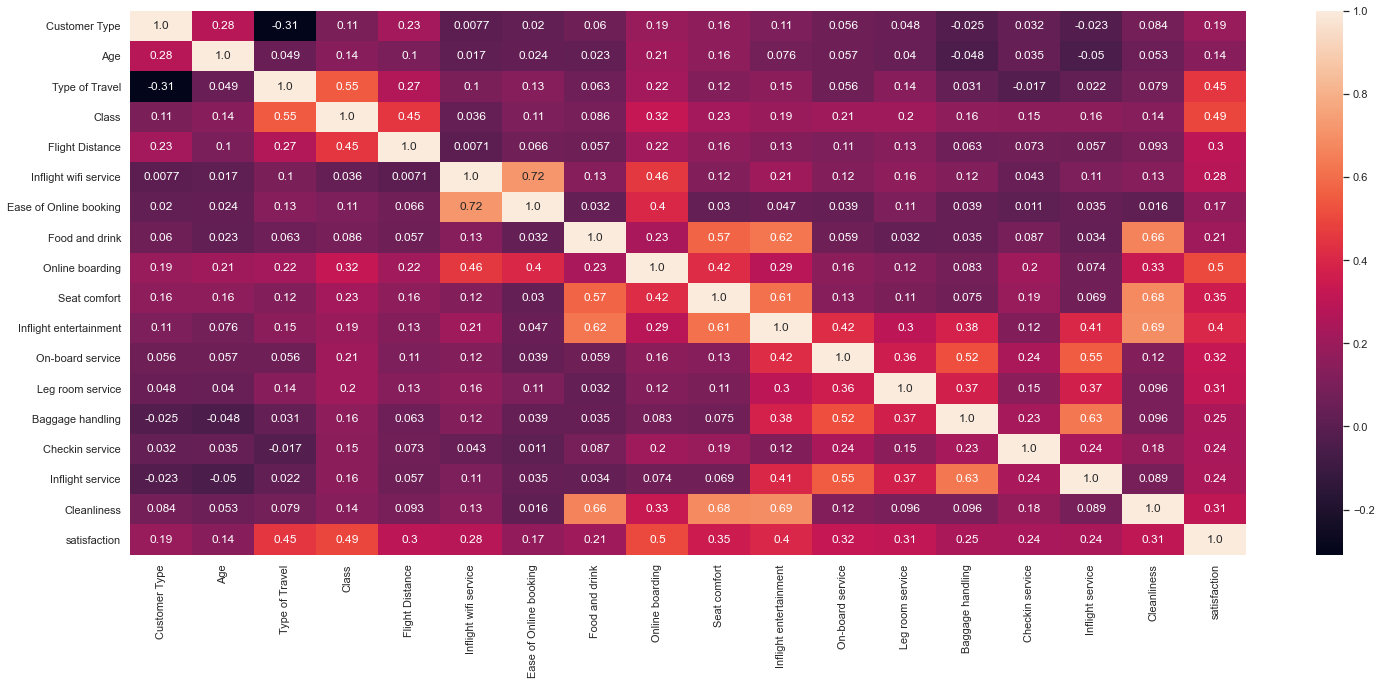

In [28]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,fmt='.2') # 'Inflight wifi service' and 'Ease of Online booking' are 72% correlated
plt.show()                                 

In [29]:
df.drop(columns='Ease of Online booking',inplace=True)

In [30]:
df.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,13,0,1,460,3,5,3,5,5,4,3,4,4,5,5,0
1,0,25,1,2,235,3,1,3,1,1,1,5,3,1,4,1,0
2,1,26,1,2,1142,2,5,5,5,5,4,3,4,4,4,5,1
3,1,25,1,2,562,2,2,2,2,2,2,5,3,1,4,2,0
4,1,61,1,2,214,3,4,5,5,3,3,4,4,3,3,3,1


In [31]:
for i in df:
    print(i)
    print(df[i].value_counts())
    print('#'*70)

Customer Type
1    84662
0    18932
Name: Customer Type, dtype: int64
######################################################################
Age
39    2961
25    2790
40    2569
44    2479
42    2453
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64
######################################################################
Type of Travel
1    71465
0    32129
Name: Type of Travel, dtype: int64
######################################################################
Class
2    49533
0    46593
1     7468
Name: Class, dtype: int64
######################################################################
Flight Distance
337     659
594     395
404     391
862     368
2475    367
       ... 
1457      1
161       1
1410      1
360       1
1223      1
Name: Flight Distance, Length: 3802, dtype: int64
######################################################################
Inflight wifi service
3    25789
2    25755
4    19737
1    17781
5    11436
0 

In [32]:
# feature selection

In [33]:
from sklearn.ensemble import ExtraTreesClassifier

In [34]:
X = df.drop('satisfaction',axis=1)
y = df['satisfaction']

In [35]:
et = ExtraTreesClassifier()

In [36]:
et.fit(X,y)

ExtraTreesClassifier()

<AxesSubplot:>

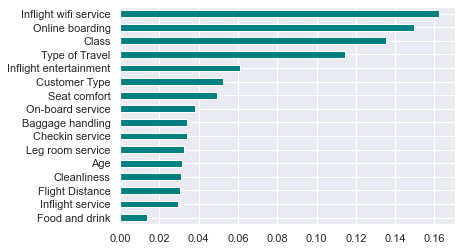

In [37]:
pd.Series(et.feature_importances_, index=X.columns).sort_values(ascending=True).plot(kind='barh',color='teal')

<AxesSubplot:>

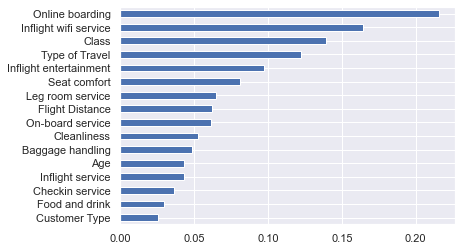

In [38]:
from sklearn.feature_selection import mutual_info_classif
mic = mutual_info_classif(X,y)
pd.Series(mic,index=X.columns).sort_values(ascending=True).plot(kind='barh')

In [39]:
df.corr()['satisfaction'].sort_values(ascending=False)

satisfaction              1.000000
Online boarding           0.503447
Class                     0.494545
Type of Travel            0.448995
Inflight entertainment    0.398203
Seat comfort              0.349112
On-board service          0.322450
Leg room service          0.313182
Cleanliness               0.305050
Flight Distance           0.298915
Inflight wifi service     0.284163
Baggage handling          0.247819
Inflight service          0.244852
Checkin service           0.235914
Food and drink            0.209659
Customer Type             0.187558
Age                       0.137040
Name: satisfaction, dtype: float64

In [40]:
# Age, food and drink, inflight service, checking service, cleanliness, flight distance, baggage handing

In [41]:
df.drop(columns=['Age','Food and drink','Inflight service','Checkin service','Cleanliness',
                 'Flight Distance','Baggage handling'],inplace=True)

In [42]:
df.head()

,Customer Type,Type of Travel,Class,Inflight wifi service,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,satisfaction
0,1,0,1,3,3,5,5,4,3,0
1,0,1,2,3,3,1,1,1,5,0
2,1,1,2,2,5,5,5,4,3,1
3,1,1,2,2,2,2,2,2,5,0
4,1,1,2,3,5,5,3,3,4,1


In [64]:
df.groupby(['Customer Type']).agg(['max','min','count','median','mean'])

Type of Travel                             Class             \
                         max min  count median      mean   max min  count   
Customer Type                                                               
0                          1   0  18932      1  0.991390     2   0  18932   
1                          1   0  84662      1  0.622428     2   0  84662   

                               Inflight wifi service                    \
              median      mean                   max min  count median   
Customer Type                                                            
0                  0  0.813279                     5   0  18932      3   
1                  1  1.076481                     5   0  84662      3   

                        Online boarding                              \
                   mean             max min  count median      mean   
Customer Type                                                         
0              2.708113               5   0  18932      3  2.709804   
1              2.734592               5   0  84662      4  3.371406   

              Seat comfort                             Inflight entertainment  \
                       max min  count median      mean                    max   
Customer Type                                                                   
0                        5   1  18932      3  2.994295                      5   
1                        5   0  84662      4  3.539380                      5   

                                          On-board service                    \
              min  count median      mean              max min  count median   
Customer Type                                                                  
0               1  18932      3  3.047961                5   1  18932      3   
1               0  84662      4  3.427748                5   0  84662      4   

                        Leg room service                              \
                   mean              max min  count median      mean   
Customer Type                                                          
0              3.229030                5   1  18932      3  3.218413   
1              3.416952                5   0  84662      4  3.381139   

              satisfaction                              
                       max min  count median      mean  
Customer Type                                           
0                        1   0  18932      0  0.236848  
1                        1   0  84662      0  0.477345

In [70]:
X = df.drop('satisfaction',axis=True)
y = df['satisfaction']

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [75]:
lr = LogisticRegression()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
algo = [lr,svm,dt,rf]

In [76]:
for i in algo:
    print(i)
    i.fit(X_train,y_train)
    print('training score')
    y_pred = i.predict(X_train)
    print('accuracy_score : ', accuracy_score(y_train,y_pred))
    print('confusion_matrix : ', confusion_matrix(y_train,y_pred))
    print('test score')
    y_pred = i.predict(X_test)
    print('accuracy_score : ', accuracy_score(y_test,y_pred))
    print('confusion_matrix : ', confusion_matrix(y_test,y_pred))
    print('#'*70)

LogisticRegression()
training score
accuracy_score :  0.8659064856711916
confusion_matrix :  [[41937  5006]
 [ 6107 29825]]
test score
accuracy_score :  0.8577634055697669
confusion_matrix :  [[10424  1330]
 [ 1617  7348]]
######################################################################
SVC()
training score
accuracy_score :  0.9354087481146305
confusion_matrix :  [[44501  2442]
 [ 2911 33021]]
test score
accuracy_score :  0.9303055166755152
confusion_matrix :  [[11069   685]
 [  759  8206]]
######################################################################
DecisionTreeClassifier()
training score
accuracy_score :  0.960711915535445
confusion_matrix :  [[45727  1216]
 [ 2040 33892]]
test score
accuracy_score :  0.9411168492687871
confusion_matrix :  [[11243   511]
 [  709  8256]]
######################################################################
RandomForestClassifier()
training score
accuracy_score :  0.960711915535445
confusion_matrix :  [[45595  1348]
 [ 1908 34024]]
tes